Generation 1: Best Fitness = 1.021996062219943e-05
Generation 2: Best Fitness = 1.0287922836201837e-05
Generation 3: Best Fitness = 1.0378709226405453e-05
Generation 4: Best Fitness = 1.0463243891673604e-05
Generation 5: Best Fitness = 1.0547470114179311e-05
Generation 6: Best Fitness = 1.0658539898921328e-05
Generation 7: Best Fitness = 1.0747081300701623e-05
Generation 8: Best Fitness = 1.0783024515219288e-05
Generation 9: Best Fitness = 1.0860820942609278e-05
Generation 10: Best Fitness = 1.0921371678198965e-05
Generation 11: Best Fitness = 1.09909630166533e-05
Generation 12: Best Fitness = 1.1036598116132628e-05
Generation 13: Best Fitness = 1.1047292848332267e-05
Generation 14: Best Fitness = 1.1094447973858926e-05
Generation 15: Best Fitness = 1.1113310419190508e-05
Generation 16: Best Fitness = 1.1136066649184283e-05
Generation 17: Best Fitness = 1.1161517375575032e-05
Generation 18: Best Fitness = 1.1167443900828272e-05
Generation 19: Best Fitness = 1.1183722656942899e-05
Gener

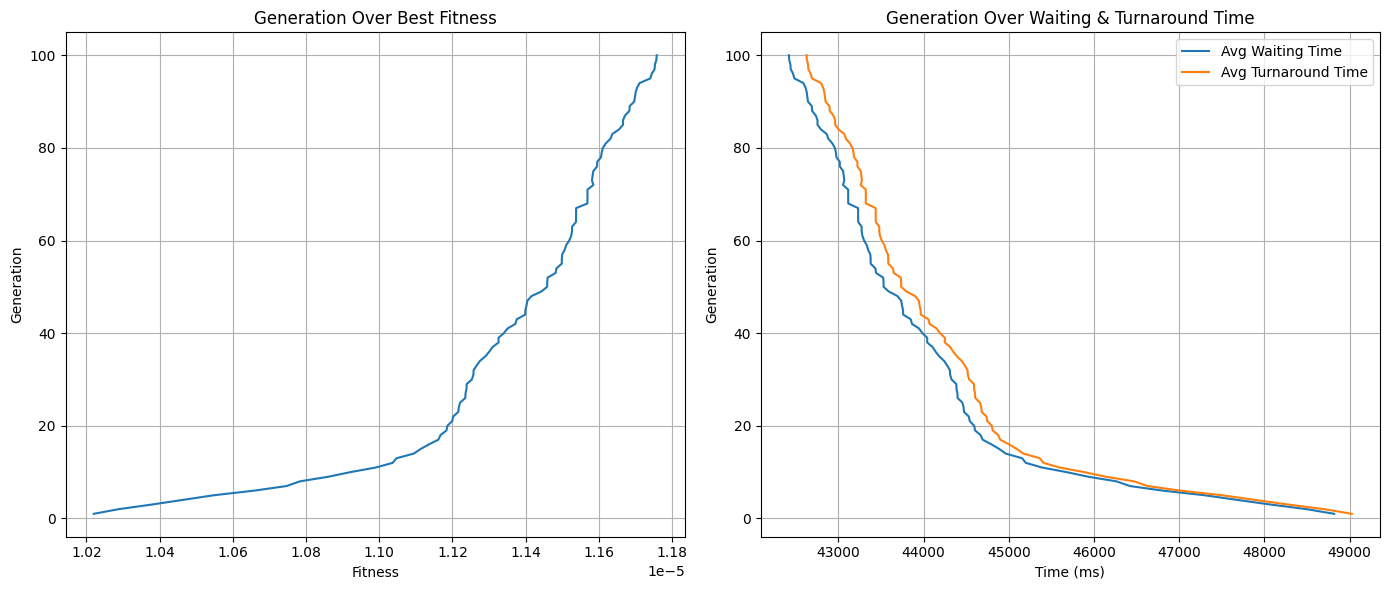


Average Waiting Time: 42419.83906500002
Average Turnaround Time: 42626.61906500002


In [ ]:
#GA
import csv
import random
import matplotlib.pyplot as plt

def read_process_data(csv_file):
    processes = []
    with open(csv_file, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            processes.append({
                'PID': row['PID'],
                'Arrival Time': float(row['Arrival Time']),
                'Burst Time': float(row['Burst Time'])
            })
    return processes

def calculate_fitness(schedule, processes):
    n = len(schedule)
    waiting_time = {}
    turnaround_time = {}
    current_time = 0
    process_map = {p['PID']: p for p in processes}

    for pid in schedule:
        process = process_map[pid]
        arrival_time = process['Arrival Time']
        burst_time = process['Burst Time']

        if current_time < arrival_time:
            current_time = arrival_time

        waiting_time[pid] = current_time - arrival_time
        turnaround_time[pid] = waiting_time[pid] + burst_time
        current_time += burst_time

    avg_waiting_time = sum(waiting_time.values()) / n
    avg_turnaround_time = sum(turnaround_time.values()) / n
    fitness = 1 / (avg_waiting_time + avg_turnaround_time)

    return fitness, avg_waiting_time, avg_turnaround_time

def generate_initial_population(processes, population_size):
    population = []
    process_ids = [p['PID'] for p in processes]

    for _ in range(population_size):
        schedule = random.sample(process_ids, len(process_ids))
        population.append(schedule)

    return population

def select_parents(population, processes):
    tournament_size = 5
    tournament = random.sample(population, tournament_size)
    parent1 = max(tournament, key=lambda schedule: calculate_fitness(schedule, processes)[0])

    tournament = random.sample(population, tournament_size)
    parent2 = max(tournament, key=lambda schedule: calculate_fitness(schedule, processes)[0])

    return parent1, parent2

def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:point] + [p for p in parent2 if p not in parent1[:point]]
    child2 = parent2[:point] + [p for p in parent1 if p not in parent2[:point]]
    return child1, child2

def mutate(schedule, mutation_rate):
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(schedule)), 2)
        schedule[i], schedule[j] = schedule[j], schedule[i]
    return schedule

def genetic_algorithm(processes, population_size=500, generations=100, mutation_rate=0.01):
    population = generate_initial_population(processes, population_size)

    best_fitness_history = []
    avg_waiting_time_history = []
    avg_turnaround_time_history = []

    for generation in range(generations):
        new_population = []

        for _ in range(population_size // 2):
            parent1, parent2 = select_parents(population, processes)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            new_population.extend([child1, child2])

        population = new_population

        best_schedule = max(population, key=lambda schedule: calculate_fitness(schedule, processes)[0])
        best_fitness, best_avg_waiting_time, best_avg_turnaround_time = calculate_fitness(best_schedule, processes)

        best_fitness_history.append(best_fitness)
        avg_waiting_time_history.append(best_avg_waiting_time)
        avg_turnaround_time_history.append(best_avg_turnaround_time)

        print(f"Generation {generation + 1}: Best Fitness = {best_fitness}")

    generations = range(1, len(best_fitness_history) + 1)
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(best_fitness_history, generations, label="Best Fitness")
    plt.ylabel("Generation")
    plt.xlabel("Fitness")
    plt.title("Generation Over Best Fitness")
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(avg_waiting_time_history, generations, label="Avg Waiting Time")
    plt.plot(avg_turnaround_time_history, generations, label="Avg Turnaround Time")
    plt.ylabel("Generation")
    plt.xlabel("Time (ms)")
    plt.title("Generation Over Waiting & Turnaround Time")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return best_avg_waiting_time, best_avg_turnaround_time

def main():
    csv_file_path = '/content/process_data.csv'
    processes = read_process_data(csv_file_path)
    avg_waiting_time, avg_turnaround_time = genetic_algorithm(processes)
    print(f"\nAverage Waiting Time: {avg_waiting_time}")
    print(f"Average Turnaround Time: {avg_turnaround_time}")

if __name__ == "__main__":
    main()


Execution order of processes in SJF:
39 -> 337 -> 21 -> 242 -> 456 -> 484 -> 258 -> 179 -> 174 -> 469 -> 373 -> 340 -> 142 -> 455 -> 311 -> 193 -> 298 -> 276 -> 432 -> 140 -> 433 -> 372 -> 182 -> 214 -> 374 -> 381 -> 446 -> 240 -> 125 -> 70 -> 190 -> 292 -> 204 -> 63 -> 51 -> 110 -> 169 -> 342 -> 15 -> 271 -> 41 -> 163 -> 152 -> 323 -> 450 -> 164 -> 289 -> 319 -> 480 -> 202 -> 474 -> 3 -> 117 -> 441 -> 225 -> 457 -> 398 -> 482 -> 264 -> 402 -> 500 -> 186 -> 19 -> 434 -> 189 -> 233 -> 364 -> 281 -> 321 -> 302 -> 224 -> 246 -> 216 -> 209 -> 13 -> 444 -> 290 -> 92 -> 487 -> 453 -> 322 -> 177 -> 94 -> 170 -> 62 -> 230 -> 407 -> 134 -> 213 -> 397 -> 313 -> 35 -> 414 -> 150 -> 185 -> 396 -> 497 -> 47 -> 65 -> 109 -> 443 -> 436 -> 405 -> 127 -> 49 -> 345 -> 5 -> 287 -> 32 -> 96 -> 30 -> 203 -> 413 -> 239 -> 315 -> 447 -> 17 -> 28 -> 251 -> 316 -> 387 -> 355 -> 153 -> 464 -> 27 -> 4 -> 449 -> 454 -> 424 -> 463 -> 155 -> 354 -> 241 -> 283 -> 421 -> 408 -> 121 -> 129 -> 300 -> 12 -> 438 -> 378 -

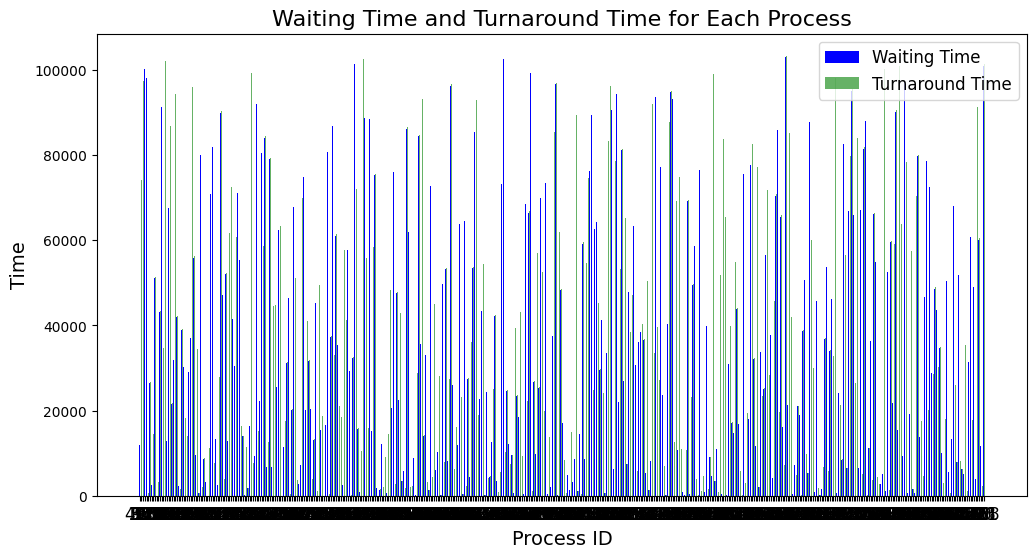


Average Waiting Time: 34903.440565
Average Turnaround Time: 35110.220564999996


In [ ]:
#SJF Shortest Job First Scheduling
import csv
import matplotlib.pyplot as plt


def read_process_data(csv_file):
    processes = []
    with open(csv_file, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            processes.append({
                'PID': row['PID'],
                'Arrival Time': float(row['Arrival Time']),
                'Burst Time': float(row['Burst Time'])
            })
    return processes


def sjf_scheduling(processes):
    n = len(processes)
    waiting_time = [0] * n
    turnaround_time = [0] * n
    completed = [False] * n
    current_time = 0
    executed_order = []

    completed_count = 0


    processes.sort(key=lambda x: x['Arrival Time'])

    while completed_count < n:
        min_burst = float('inf')
        idx = -1

        for i in range(n):
            if (processes[i]['Arrival Time'] <= current_time) and (not completed[i]) and (processes[i]['Burst Time'] < min_burst):
                min_burst = processes[i]['Burst Time']
                idx = i

        if idx == -1:
            # If no process has arrived yet, move time forward
            current_time += 1
            continue

        # Execute the chosen process
        executed_order.append(processes[idx]['PID'])
        current_time += processes[idx]['Burst Time']
        waiting_time[idx] = current_time - processes[idx]['Burst Time'] - processes[idx]['Arrival Time']
        turnaround_time[idx] = current_time - processes[idx]['Arrival Time']
        completed[idx] = True
        completed_count += 1

    # Calculate average waiting time and turnaround time
    avg_waiting_time = sum(waiting_time) / n
    avg_turnaround_time = sum(turnaround_time) / n

    # Print the execution order and waiting time for each process
    print("Execution order of processes in SJF:")
    print(" -> ".join(executed_order))
    print("\nWaiting times for each process:")
    for i in range(n):
        print(f"{processes[i]['PID']} -> Waiting Time: {waiting_time[i]}")


    return processes, waiting_time, turnaround_time, avg_waiting_time, avg_turnaround_time


def plot_waiting_turnaround_times(processes, waiting_time, turnaround_time):
    pids = [process['PID'] for process in processes]

    fig, ax = plt.subplots(figsize=(12, 6))  # Increased figure size

    # Create bar plots
    width = 0.35  # Width of bars
    x = range(len(pids))

    # Create bars for waiting time
    bars1 = ax.bar(x, waiting_time, width, label='Waiting Time', color='blue')

    # Create bars for turnaround time
    bars2 = ax.bar([i + width for i in x], turnaround_time, width, label='Turnaround Time', color='green', alpha=0.6)

    ax.set_xlabel('Process ID', fontsize=14)
    ax.set_ylabel('Time', fontsize=14)
    ax.set_title('Waiting Time and Turnaround Time for Each Process', fontsize=16)
    ax.set_xticks([i + width / 2 for i in x])
    ax.set_xticklabels(pids, fontsize=12)
    ax.legend(fontsize=12)
    plt.show()

# Main function to apply SJF on CSV data and visualize
def main():
    # CSV file path (make sure it points to your actual file)
    csv_file_path = '/content/process_data.csv'

    # Read process data from CSV file
    processes = read_process_data(csv_file_path)


    processes, waiting_time, turnaround_time, avg_waiting_time, avg_turnaround_time = sjf_scheduling(processes)


    plot_waiting_turnaround_times(processes, waiting_time, turnaround_time)


    print(f"\nAverage Waiting Time: {avg_waiting_time}")
    print(f"Average Turnaround Time: {avg_turnaround_time}")


if __name__ == "__main__":
    main()


Execution order of processes in FCFS:
493 -> 90 -> 156 -> 305 -> 158 -> 110 -> 114 -> 209 -> 76 -> 234 -> 456 -> 177 -> 219 -> 349 -> 366 -> 52 -> 85 -> 103 -> 184 -> 2 -> 252 -> 161 -> 255 -> 246 -> 264 -> 499 -> 55 -> 430 -> 149 -> 200 -> 367 -> 466 -> 392 -> 141 -> 227 -> 169 -> 136 -> 233 -> 295 -> 94 -> 39 -> 54 -> 420 -> 226 -> 354 -> 131 -> 216 -> 379 -> 194 -> 48 -> 414 -> 332 -> 221 -> 14 -> 43 -> 477 -> 44 -> 256 -> 25 -> 262 -> 391 -> 138 -> 484 -> 232 -> 500 -> 116 -> 333 -> 241 -> 410 -> 344 -> 422 -> 388 -> 270 -> 427 -> 58 -> 27 -> 82 -> 119 -> 464 -> 425 -> 475 -> 33 -> 122 -> 46 -> 21 -> 351 -> 176 -> 451 -> 460 -> 140 -> 448 -> 50 -> 100 -> 397 -> 487 -> 424 -> 277 -> 279 -> 171 -> 245 -> 377 -> 79 -> 313 -> 416 -> 67 -> 289 -> 18 -> 334 -> 78 -> 337 -> 222 -> 303 -> 433 -> 120 -> 37 -> 23 -> 42 -> 248 -> 40 -> 250 -> 13 -> 293 -> 461 -> 459 -> 83 -> 455 -> 490 -> 347 -> 133 -> 64 -> 152 -> 495 -> 369 -> 278 -> 231 -> 111 -> 165 -> 294 -> 478 -> 98 -> 186 -> 242 -> 22

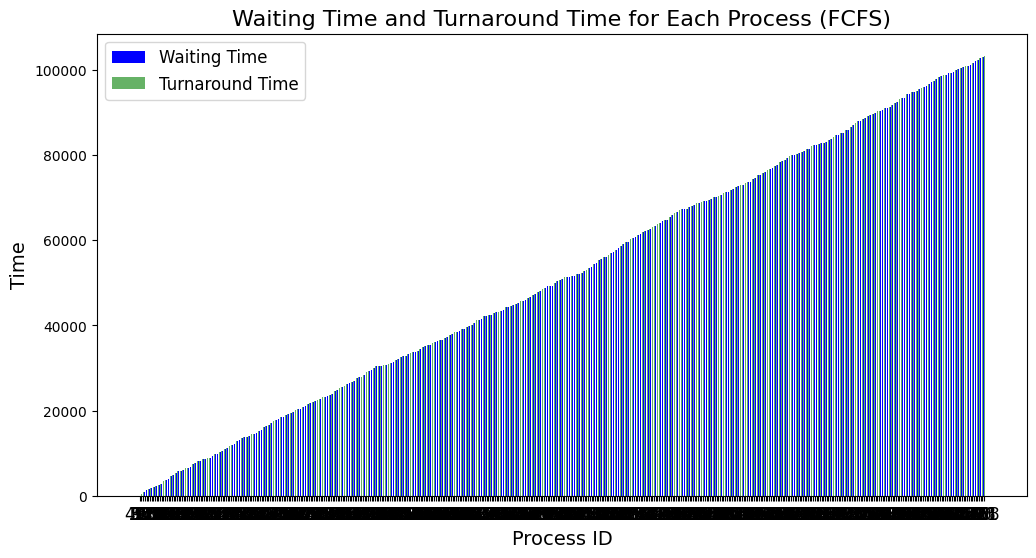


Average Waiting Time: 51621.369565
Average Turnaround Time: 51828.149565


In [ ]:
#FCFS First Come,First Serve Scheduling
import csv
import matplotlib.pyplot as plt

# Function to read the dataset from CSV file
def read_process_data(csv_file):
    processes = []
    with open(csv_file, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            processes.append({
                'PID': row['PID'],
                'Arrival Time': float(row['Arrival Time']),
                'Burst Time': float(row['Burst Time'])
            })
    return processes

# FCFS scheduling function
def fcfs_scheduling(processes):
    n = len(processes)
    waiting_time = [0] * n
    turnaround_time = [0] * n
    current_time = 0
    executed_order = []

    # Sort processes by Arrival Time (FCFS principle)
    processes.sort(key=lambda x: x['Arrival Time'])

    for i in range(n):
        pid = processes[i]['PID']
        arrival_time = processes[i]['Arrival Time']
        burst_time = processes[i]['Burst Time']

        # If the process arrives after the current time, move the current time forward
        if current_time < arrival_time:
            current_time = arrival_time

        # The waiting time is the difference between current time and arrival time
        waiting_time[i] = current_time - arrival_time
        turnaround_time[i] = waiting_time[i] + burst_time

        # Process the current job (execute it)
        executed_order.append(pid)
        current_time += burst_time

    # Calculate average waiting time and turnaround time
    avg_waiting_time = sum(waiting_time) / n
    avg_turnaround_time = sum(turnaround_time) / n

    # Print the execution order and waiting time for each process
    print("Execution order of processes in FCFS:")
    print(" -> ".join(executed_order))
    print("\nWaiting times for each process:")
    for i in range(n):
        print(f"{processes[i]['PID']} -> Waiting Time: {waiting_time[i]}")

    return processes, waiting_time, turnaround_time, avg_waiting_time, avg_turnaround_time

# Function to plot waiting and turnaround times
def plot_waiting_turnaround_times(processes, waiting_time, turnaround_time):
    pids = [process['PID'] for process in processes]

    fig, ax = plt.subplots(figsize=(12, 6))  # Increased figure size

    # Create bar plots
    width = 0.35  # Width of bars
    x = range(len(pids))

    # Create bars for waiting time
    bars1 = ax.bar(x, waiting_time, width, label='Waiting Time', color='blue')

    # Create bars for turnaround time
    bars2 = ax.bar([i + width for i in x], turnaround_time, width, label='Turnaround Time', color='green', alpha=0.6)

    ax.set_xlabel('Process ID', fontsize=14)
    ax.set_ylabel('Time', fontsize=14)
    ax.set_title('Waiting Time and Turnaround Time for Each Process (FCFS)', fontsize=16)
    ax.set_xticks([i + width / 2 for i in x])
    ax.set_xticklabels(pids, fontsize=12)
    ax.legend(fontsize=12)
    plt.show()

# Main function to apply FCFS on CSV data and visualize
def main():
    # CSV file path (make sure it points to your actual file)
    csv_file_path = '/content/process_data.csv'

    # Read process data from CSV file
    processes = read_process_data(csv_file_path)

    # Apply FCFS scheduling
    processes, waiting_time, turnaround_time, avg_waiting_time, avg_turnaround_time = fcfs_scheduling(processes)

    # Plot waiting and turnaround times
    plot_waiting_turnaround_times(processes, waiting_time, turnaround_time)

    # Print average waiting and turnaround times
    print(f"\nAverage Waiting Time: {avg_waiting_time}")
    print(f"Average Turnaround Time: {avg_turnaround_time}")

# Run the main function
if __name__ == "__main__":
    main()
